## Context

ABC Supermarket is planning for the year-end sale - they want to launch a new offer i.e. gold membership for only \\$499 that is of \\$999 on normal days (that gives 20% discount on all purchases) only for existing customers, for that they need to do a campaign through phone calls - the best way to reduce the cost of the campaign is to make a predictive model to classify customers who might purchase the offer, using the data they gathered during last year's campaign.

We will build a model for classifying whether customers will reply with a positive
response or not.

## Import Statements

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("marketing_data.xlsx")

## Column Definitions
- Response (target) - 1 if customer accepted the offer in the last campaign, 0
otherwise
- Complain - 1 if a customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase
- ID - unique customer-id
- Year_Birth - customer's year of birth

## Data Profiling

In [3]:
# check first 10 rows
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/14,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/14,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01 00:00:00,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01 00:00:00,0,384,...,21,32,5,3,6,2,9,4,0,0


In [4]:
# check last 10 rows
df.tail(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2230,3363,1974,2n Cycle,Married,20130.0,0,0,3/17/14,99,0,...,7,6,12,1,1,0,3,8,0,0
2231,8595,1973,Graduation,Widow,42429.0,0,1,2014-11-02 00:00:00,99,55,...,2,0,4,2,1,1,3,5,0,0
2232,7232,1973,Graduation,Widow,42429.0,0,1,2014-11-02 00:00:00,99,55,...,2,0,4,2,1,1,3,5,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/13,99,15,...,7,4,25,1,2,1,2,5,0,1
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/13,99,321,...,33,26,34,3,9,3,5,4,0,0
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,2012-01-09 00:00:00,99,169,...,188,0,144,1,8,5,4,7,1,0


In [5]:
# check for the dimensions
df.shape

(2240, 22)

In [6]:
# check for each column's data type
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [7]:
# check for nulls in each column
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [8]:
import pandas as pd

# fill NAs in 'Income' with 0
df['Income'].fillna('0', inplace=True)
null_income_rows = df[df['Income'].isnull()]
print("Rows with null values in 'Income' column:")
print(null_income_rows)

Rows with null values in 'Income' column:
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain]
Index: []

[0 rows x 22 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_19316\2778892840.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Income'].fillna('0', inplace=True)


In [9]:
# check for unique 'Marital_Status' values
unique_marital_status_values = df['Marital_Status'].unique()
print("Unique values in 'Marital_Status' column:")
print(unique_marital_status_values)

Unique values in 'Marital_Status' column:
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [10]:
# change YOLO, Alone, Absurd to Single
df['Marital_Status'] = df['Marital_Status'].replace({'YOLO': 'Single', 'Alone': 'Single', 'Absurd': 'Single'})
print(df[['ID', 'Marital_Status']])

         ID Marital_Status
0      1826       Divorced
1         1         Single
2     10476        Married
3      1386       Together
4      5371         Single
...     ...            ...
2235  10142       Divorced
2236   5263        Married
2237     22       Divorced
2238    528        Married
2239   4070        Married

[2240 rows x 2 columns]


In [11]:
# check for unique 'Marital_Status' values
unique_marital_status_values = df['Marital_Status'].unique()
print("Unique values in 'Marital_Status' column:")
print(unique_marital_status_values)

Unique values in 'Marital_Status' column:
['Divorced' 'Single' 'Married' 'Together' 'Widow']


In [12]:
# check for unique 'Education' values
unique_education_values = df['Education'].unique()
print("Unique values in 'Education' column:")
print(unique_education_values)

Unique values in 'Education' column:
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [13]:
# count number of rows for each unique value in 'Marital_Status'
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64

In [14]:
# count number of rows for each unique value in 'Education'
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [15]:
import pandas as pd
from datetime import datetime

# convert 'Year_Birth' column to datetime
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

# calculate 'Age' by subtracting the birth year from the current year
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth'].dt.year

print(df[['ID', 'Year_Birth', 'Age']])

         ID Year_Birth  Age
0      1826 1970-01-01   54
1         1 1961-01-01   63
2     10476 1958-01-01   66
3      1386 1967-01-01   57
4      5371 1989-01-01   35
...     ...        ...  ...
2235  10142 1976-01-01   48
2236   5263 1977-01-01   47
2237     22 1976-01-01   48
2238    528 1978-01-01   46
2239   4070 1969-01-01   55

[2240 rows x 3 columns]


In [16]:
# count number of rows for each unique value in 'Age'
df['Age'].value_counts()

Age
48     89
53     87
49     83
52     79
54     77
46     77
59     74
51     74
55     71
50     69
68     55
45     53
66     53
72     52
47     52
65     51
56     51
58     50
70     50
69     49
64     49
42     45
61     45
57     44
62     44
67     43
73     43
60     42
41     42
38     42
44     39
43     39
40     38
63     36
71     35
39     32
35     30
75     30
74     29
36     29
37     27
76     21
34     18
77     16
78     16
33     15
32     13
79      8
80      7
81      7
31      5
29      5
30      3
28      2
131     1
125     1
83      1
84      1
124     1
Name: count, dtype: int64

In [17]:
import pandas as pd
from datetime import datetime

# convert 'DtCustomer' column to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# calculate the duration of the customer's relationship with the company
current_date = datetime.now()
df['Customer_Relationship_Length'] = (current_date - df['Dt_Customer']).dt.days

print(df[['ID', 'Dt_Customer', 'Customer_Relationship_Length']])

C:\Users\user\AppData\Local\Temp\ipykernel_19316\2027957642.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


         ID Dt_Customer  Customer_Relationship_Length
0      1826  2014-06-16                          3543
1         1  2014-06-15                          3544
2     10476  2014-05-13                          3577
3      1386  2014-11-05                          3401
4      5371  2014-08-04                          3494
...     ...         ...                           ...
2235  10142  2013-07-03                          3891
2236   5263  2013-01-22                          4053
2237     22  2012-03-12                          4369
2238    528  2012-11-29                          4107
2239   4070  2012-01-09                          4432

[2240 rows x 3 columns]


In [18]:
# change 'Year_Birth' format to YYYY
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

# get earliest birth year
earliest_birth_year = df['Year_Birth'].min()
print("Earliest Birth Year:", earliest_birth_year)

Earliest Birth Year: 1893-01-01 00:00:00


In [19]:
# filter rows where 'Year_Birth' is after or equal to 1900
df = df[df['Year_Birth'].dt.year >= 1900]

In [20]:
# change 'Dt_Customer' format to YYYY
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y')

# get earliest registration year
earliest_reg_year = df['Dt_Customer'].min()
print("Earliest Registration Year:", earliest_reg_year)

Earliest Registration Year: 2012-01-08 00:00:00


<Axes: title={'center': 'Dt_Customer'}, xlabel='Dt_Customer'>

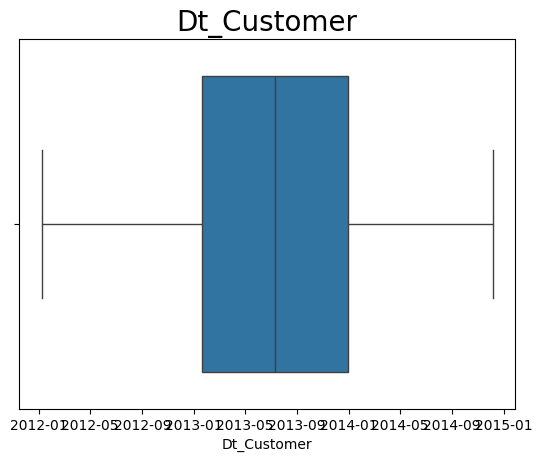

In [21]:
# check for outliers in 'Dt_Customer
plt.title("Dt_Customer", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Dt_Customer"])

<Axes: title={'center': 'Income'}, xlabel='Income'>

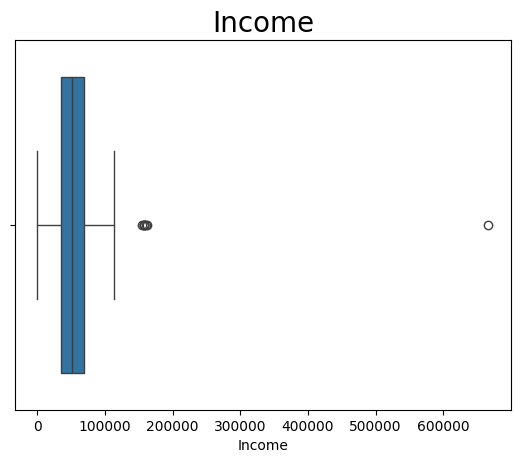

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# check outliers in 'Income'
plt.title("Income", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Income"])

<Axes: title={'center': 'MntFishProducts'}, xlabel='MntFishProducts'>

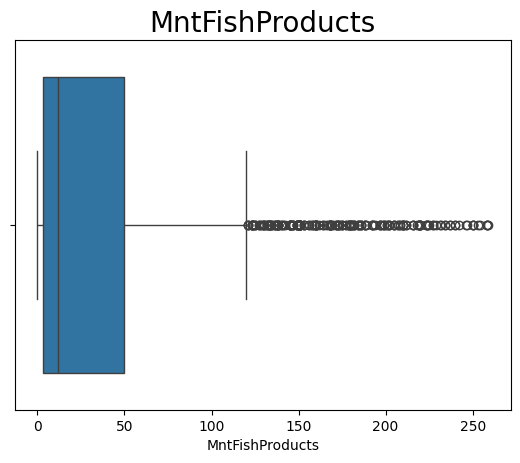

In [23]:
# check for outliers in 'MntFishProducts'
plt.title("MntFishProducts", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntFishProducts"])

<Axes: title={'center': 'MntMeatProducts'}, xlabel='MntMeatProducts'>

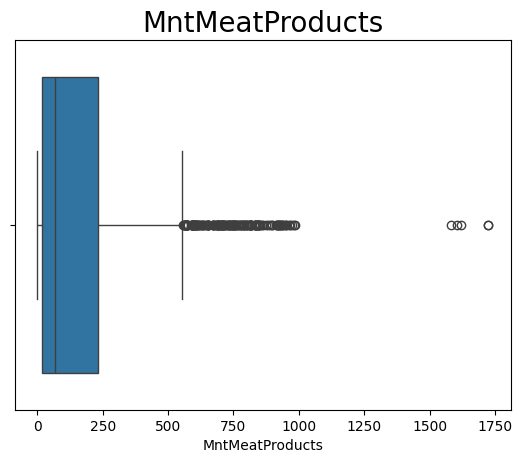

In [24]:
# check for outliers in 'MntMeatProducts'
plt.title("MntMeatProducts", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntMeatProducts"])

<Axes: title={'center': 'MntFruits'}, xlabel='MntFruits'>

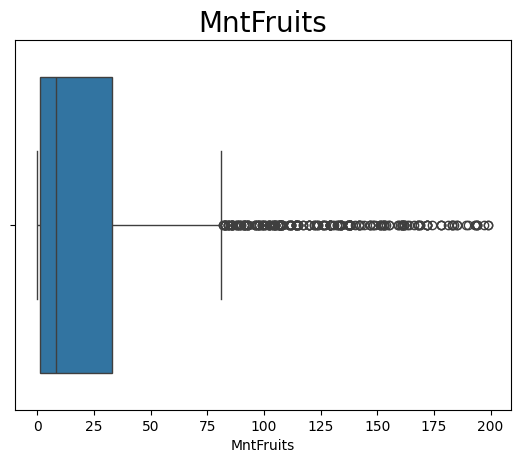

In [25]:
# check for outliers in 'MntFruits'
plt.title("MntFruits", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntFruits"])

<Axes: title={'center': 'MntSweetProducts'}, xlabel='MntSweetProducts'>

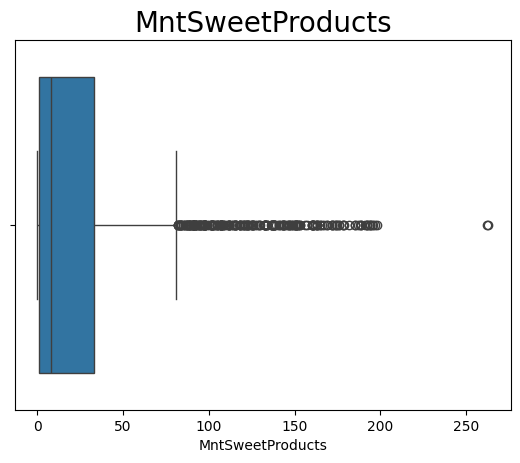

In [26]:
# check for outliers in 'MntSweetProducts'
plt.title("MntSweetProducts", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntSweetProducts"])

<Axes: title={'center': 'MntWines'}, xlabel='MntWines'>

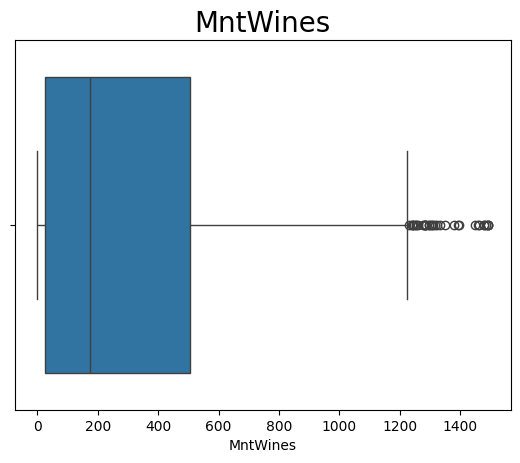

In [27]:
# check for outliers in 'MntWines'
plt.title("MntWines", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntWines"])

<Axes: title={'center': 'MntGoldProds'}, xlabel='MntGoldProds'>

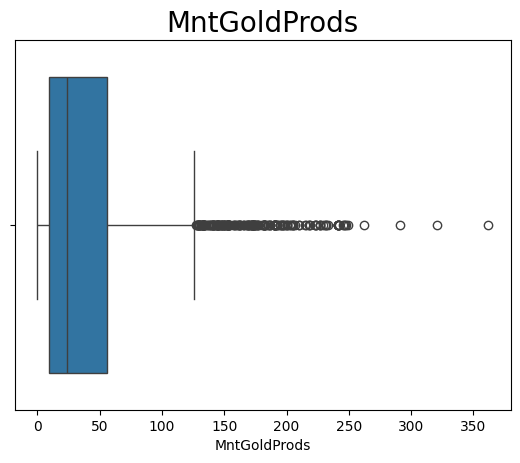

In [28]:
# check for outliers in 'MntGoldProducts'
plt.title("MntGoldProds", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntGoldProds"])

<Axes: title={'center': 'NumDealsPurchases'}, xlabel='NumDealsPurchases'>

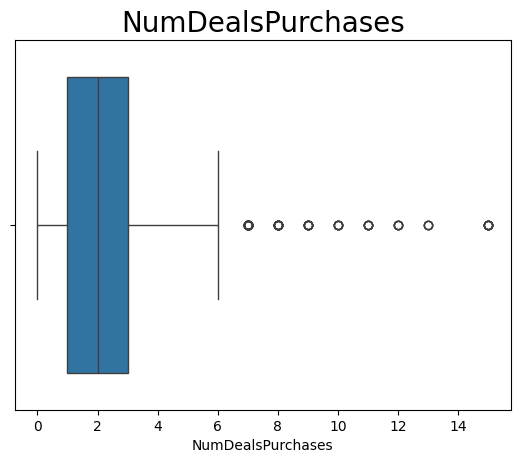

In [29]:
# check for outliers in 'NumDealsPurchases'
plt.title("NumDealsPurchases", fontdict = {'fontsize': 20})
sns.boxplot(x=df["NumDealsPurchases"])

<Axes: title={'center': 'NumCatalogPurchases'}, xlabel='NumCatalogPurchases'>

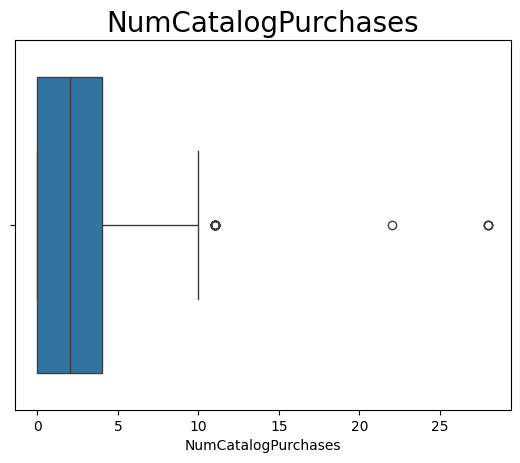

In [30]:
# check for outliers in 'NumCatalogPurchases'
plt.title("NumCatalogPurchases", fontdict = {'fontsize': 20})
sns.boxplot(x=df["NumCatalogPurchases"])

<Axes: title={'center': 'NumWebVisitsMonth'}, xlabel='NumWebVisitsMonth'>

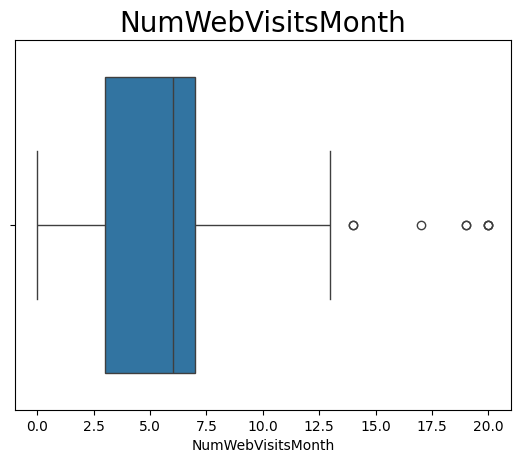

In [31]:
# check for outliers in 'NumWebVisitsMonth'
plt.title("NumWebVisitsMonth", fontdict = {'fontsize': 20})
sns.boxplot(x=df["NumWebVisitsMonth"])

## Initial Exploratory Data Analysis

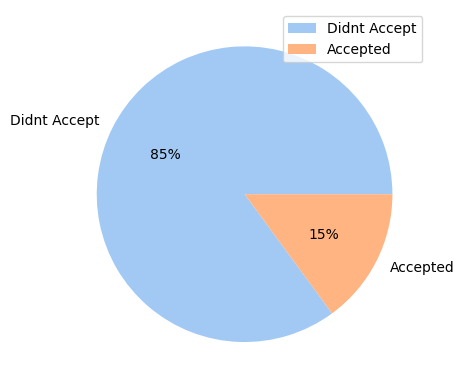

In [32]:
colors = sns.color_palette('pastel')[0:len(df['Response'].value_counts())]

#create pie chart
plt.pie(df['Response'].value_counts(), labels=['Didnt Accept', 'Accepted'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

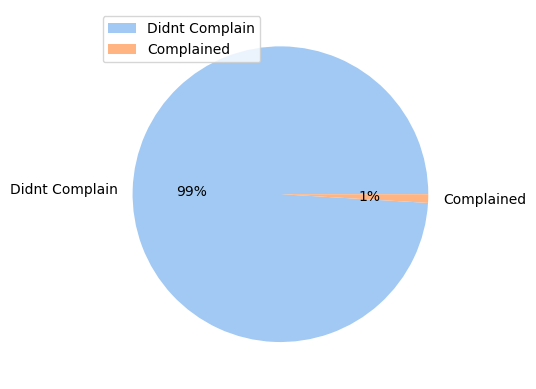

In [33]:
colors = sns.color_palette('pastel')[0:len(df['Complain'].value_counts())]

#create pie chart
plt.pie(df['Complain'].value_counts(), labels=['Didnt Complain', 'Complained'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

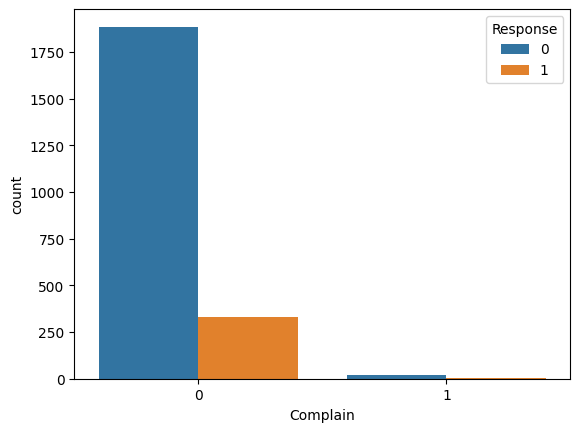

In [34]:
sns.barplot(x = 'Complain', y='count', hue = 'Response',data=df[['Complain', 'Response']].value_counts().reset_index())
    
plt.show()

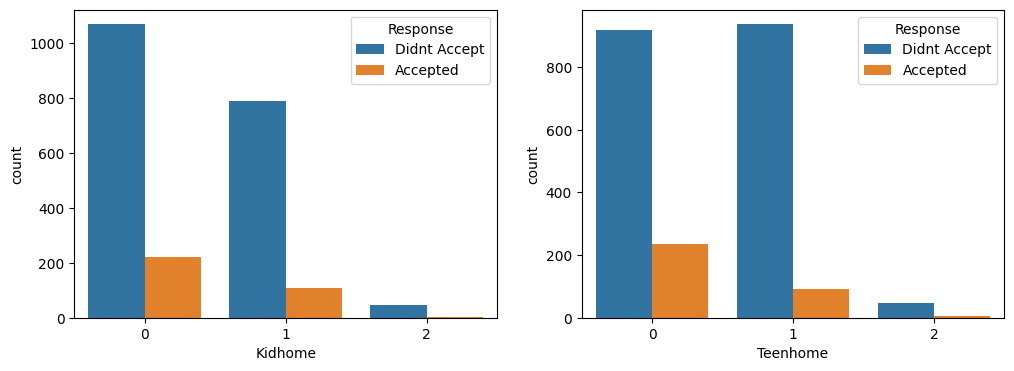

In [35]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

for i, ax, col in zip(range(2), axes.flat, ['Kidhome', 'Teenhome']):
    tmp = df[[col, 'Response']].value_counts().to_frame().reset_index()
    tmp['Response'] = tmp['Response'].replace({0: 'Didnt Accept', 1: 'Accepted'})

    sns.barplot(x = col, y='count', 
                   hue = 'Response',data=tmp, ax=ax)
    
plt.show()

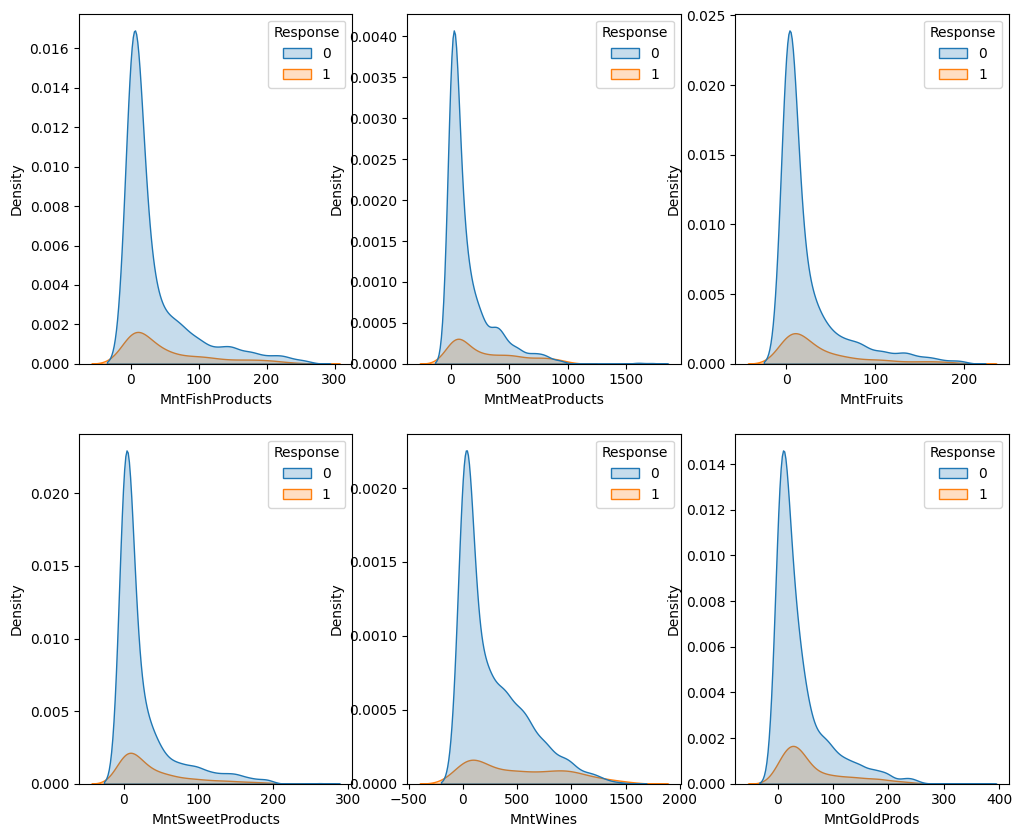

In [36]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 10))

for i, ax, col in zip(range(6), axes.flat, ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']):
    sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)
    
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19316\2938480726.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = df.groupby('AgeGroup')['Response'].value_counts(normalize=True).unstack().fillna(0)


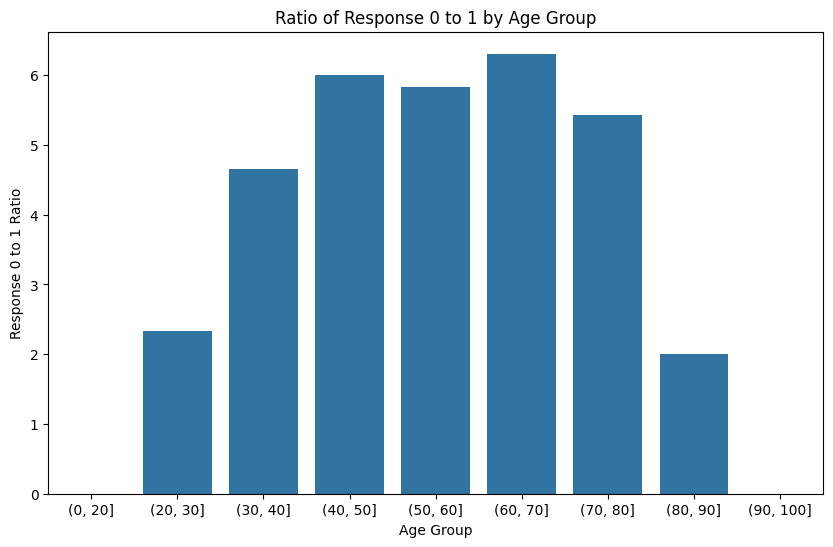

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a new column 'AgeGroup' based on age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

# Calculate the ratio of Response 0 to 1 for each age group
ratio_df = df.groupby('AgeGroup')['Response'].value_counts(normalize=True).unstack().fillna(0)
ratio_df['Ratio'] = ratio_df[0] / ratio_df[1]

# Plotting Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=ratio_df.index, y=ratio_df['Ratio'])
plt.xlabel('Age Group')
plt.ylabel('Response 0 to 1 Ratio')
plt.title('Ratio of Response 0 to 1 by Age Group')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_19316\3473452906.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = df.groupby('Length')['Response'].value_counts(normalize=True).unstack().fillna(0)


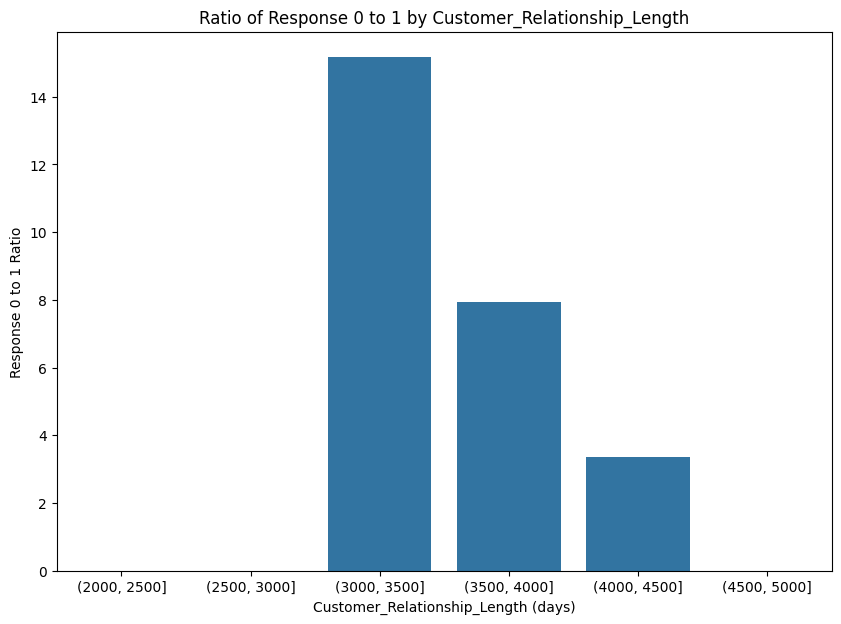

In [38]:
length_bins = [2000, 2500, 3000, 3500, 4000, 4500, 5000]

# Create a new column 'Length' based on length bins
df['Length'] = pd.cut(df['Customer_Relationship_Length'], bins=length_bins)

# Calculate the ratio of Response 0 to 1 for each length bin
ratio_df = df.groupby('Length')['Response'].value_counts(normalize=True).unstack().fillna(0)
ratio_df['Ratio'] = ratio_df[0] / ratio_df[1]

# Plotting Bar Plot
plt.figure(figsize=(10, 7))
sns.barplot(x=ratio_df.index, y=ratio_df['Ratio'])
plt.xlabel('Customer_Relationship_Length (days)')
plt.ylabel('Response 0 to 1 Ratio')
plt.title('Ratio of Response 0 to 1 by Customer_Relationship_Length')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19316\165724313.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = df.groupby('IncomeRange')['Response'].value_counts(normalize=True).unstack().fillna(0)


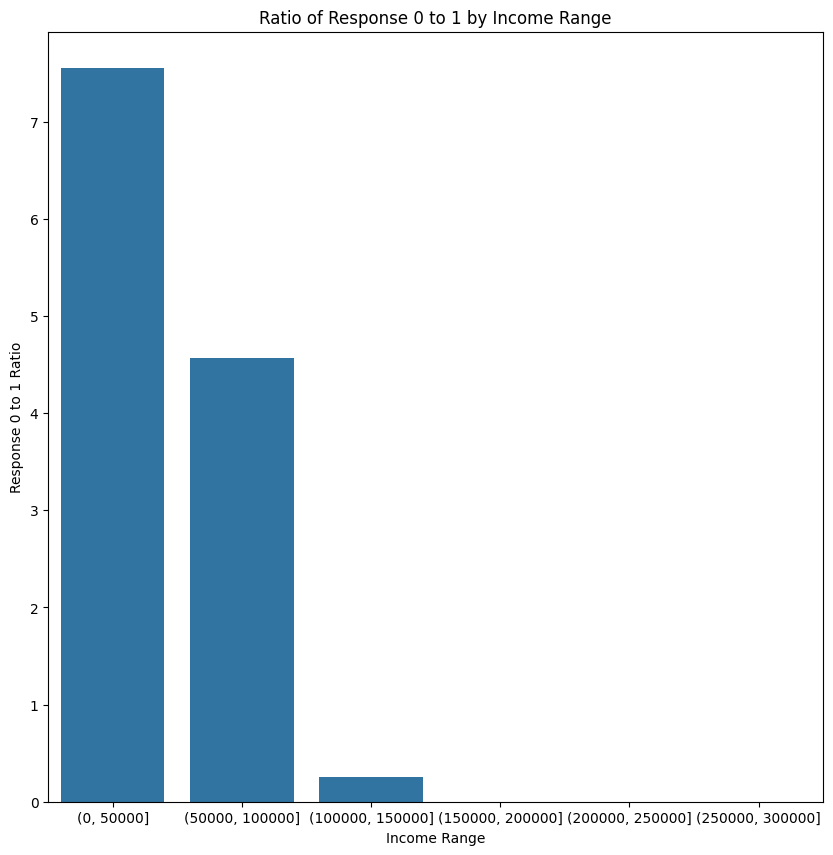

In [39]:
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Assuming 'Response' and 'Income' are columns in your DataFrame
income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000]

# Create a new column 'IncomeRange' based on income bins
df['IncomeRange'] = pd.cut(df['Income'], bins=income_bins)

# Calculate the ratio of Response 0 to 1 for each income bin
ratio_df = df.groupby('IncomeRange')['Response'].value_counts(normalize=True).unstack().fillna(0)
ratio_df['Ratio'] = ratio_df[0] / ratio_df[1]

# Plotting Bar Plot
plt.figure(figsize=(10, 10))
sns.barplot(x=ratio_df.index, y=ratio_df['Ratio'])
plt.xlabel('Income Range')
plt.ylabel('Response 0 to 1 Ratio')
plt.title('Ratio of Response 0 to 1 by Income Range')
plt.show()


In [40]:
df['Kidhome'].value_counts()

Kidhome
0    1291
1     899
2      48
Name: count, dtype: int64

In [41]:
df['Teenhome'].value_counts()

Teenhome
0    1157
1    1029
2      52
Name: count, dtype: int64

In [42]:
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

In [43]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [44]:
df['Income_Per_Child'] = df['Income'] / np.where((df['Kidhome'] + df['Teenhome']) == 0, 1, (df['Kidhome'] + df['Teenhome']))

In [45]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            485
Master         370
2n Cycle       202
Basic           54
Name: count, dtype: int64

In [46]:
df['Customer_Relationship_Length'].value_counts()

Customer_Relationship_Length
4197    12
4097    11
4030    11
3371    11
3843    10
        ..
3821     1
3939     1
3874     1
3849     1
4432     1
Name: count, Length: 663, dtype: int64

In [47]:
df['ID'].value_counts()

ID
1826    1
5680    1
4640    1
2525    1
9503    1
       ..
3262    1
5342    1
2379    1
2882    1
4070    1
Name: count, Length: 2238, dtype: int64

In [48]:
import pandas as pd

#age categories: Teen (0-19), Adult (20-59), Old (60+)
bins = [-float('inf'), 19, 59, float('inf')]
labels = ['Teen', 'Adult', 'Old']
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df[['ID', 'Age', 'Age_Category']])

         ID  Age Age_Category
0      1826   54        Adult
1         1   63          Old
2     10476   66          Old
3      1386   57        Adult
4      5371   35        Adult
...     ...  ...          ...
2235  10142   48        Adult
2236   5263   47        Adult
2237     22   48        Adult
2238    528   46        Adult
2239   4070   55        Adult

[2238 rows x 3 columns]


In [49]:
df['WebPurchase_Visit_Rate'] = np.divide(df['NumWebPurchases'], df['NumWebVisitsMonth'], out=np.full_like(df['NumWebPurchases'], np.nan), where=df['NumWebVisitsMonth'] != 0)

print(df[['ID', 'NumWebPurchases', 'NumWebVisitsMonth', 'WebPurchase_Visit_Rate']])

         ID  NumWebPurchases  NumWebVisitsMonth  WebPurchase_Visit_Rate
0      1826                4                  1                       4
1         1                7                  5                       1
2     10476                3                  2                       1
3      1386                1                  7                       0
4      5371                3                  7                       0
...     ...              ...                ...                     ...
2235  10142                5                  4                       1
2236   5263                1                  8                       0
2237     22                6                  8                       0
2238    528                5                  3                       1
2239   4070                8                  7                       1

[2238 rows x 4 columns]


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\series.py:953: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


## Baseline Modelling

In [50]:
df=df[['NumDealsPurchases','NumWebVisitsMonth', 'Customer_Relationship_Length', 'Age',  'Recency', 'Income', 'Response', 'Education', 'NumCatalogPurchases']]

In [51]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [52]:
columns = ['Education']
df = one_hot_encode(df, columns)

In [53]:
X = df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

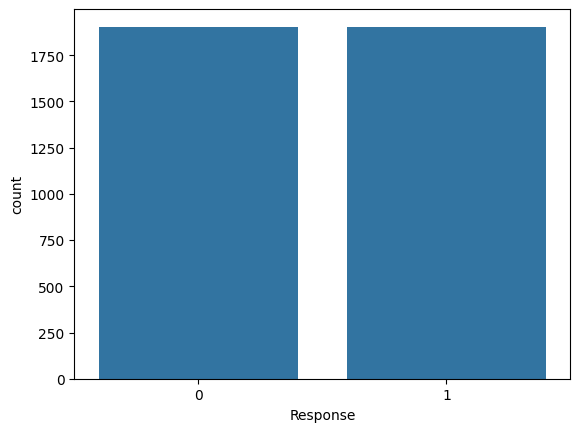

In [54]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [56]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
preds = clf.predict(scaler.transform(X_test))

In [57]:
# count unique values in 'Response'
response_counts = df['Response'].value_counts()

print(response_counts)

Response
0    1904
1     334
Name: count, dtype: int64


In [58]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [59]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8549
Precision: 0.6250
Recall: 0.0746
F1: 0.1333
AUC: 0.5334


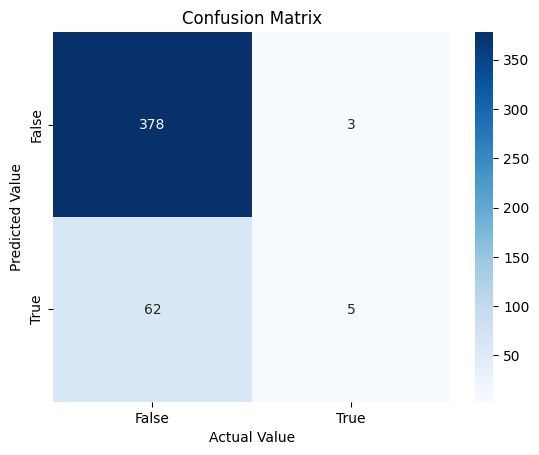

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' contains true labels and 'preds' contains predicted labels
cm = confusion_matrix(y_test, preds)

# Extract True Positives, False Positives, True Negatives, False Negatives
tn, fn, fp, tp = cm.ravel()

# Create a heatmap for visualization with custom labels
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['False', 'True'],
            yticklabels=['False', 'True'])

# Modify axis labels
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')


plt.show()


In [61]:
# Display the estimated coefficients
print("Estimated Coefficients:")
print(clf.coef_)
print("Intercept:", clf.intercept_)

Estimated Coefficients:
[[-0.1673072   0.32859588  0.52779499 -0.12432142 -0.63239659  0.12794643
   0.65065972 -0.07808835  0.13371477  0.23833435  0.35380667]]
Intercept: [-2.11813968]


### Using other Machine Learning Models

In [62]:
# using Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

param_grid = {}  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gaussian_nb = GaussianNB()
grid = GridSearchCV(estimator=gaussian_nb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)

preds = grid_result.predict(X_test_scaled)


In [63]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [64]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.6732
Precision: 0.6091
Recall: 0.9079
F1: 0.7291
AUC: 0.6804


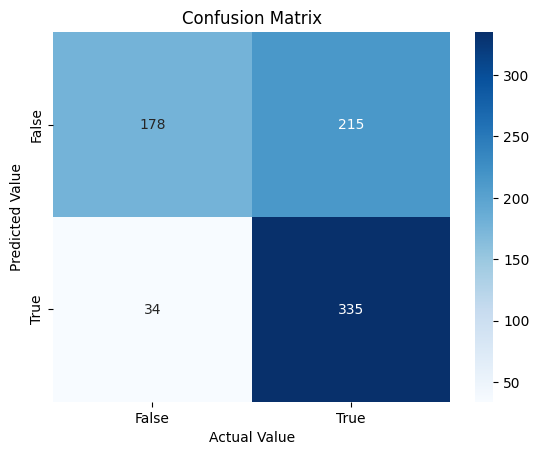

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' contains true labels and 'preds' contains predicted labels
cm = confusion_matrix(y_test, preds)

# Extract True Positives, False Positives, True Negatives, False Negatives
tn, fn, fp, tp = cm.ravel()

# Create a heatmap for visualization with custom labels
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['False', 'True'],
            yticklabels=['False', 'True'])

# Modify axis labels
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')


plt.show()


In [66]:
# using Decision Trees
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  3
Max Nvl:  11
Algorithm:  gini
Score:  0.9044679533769415


In [67]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, max_depth= 3, random_state=42)
decision_tree.fit(X_train, y_train)
preds = decision_tree.predict(X_test)

In [68]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [69]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.6955
Precision: 0.6412
Recall: 0.8428
F1: 0.7283
AUC: 0.7000


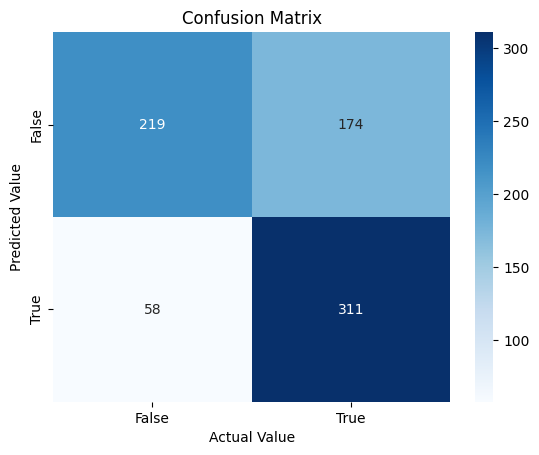

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' contains true labels and 'preds' contains predicted labels
cm = confusion_matrix(y_test, preds)

# Extract True Positives, False Positives, True Negatives, False Negatives
tn, fn, fp, tp = cm.ravel()

# Create a heatmap for visualization with custom labels
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['False', 'True'],
            yticklabels=['False', 'True'])

# Modify axis labels
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')


plt.show()
